In [1]:
import xarray as xr
import numpy as np
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

from collections import namedtuple
from shapely import geometry

import scipy 

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext version_information
%version_information numpy, matplotlib, xarray, cartopy, scipy

Software versions
Python 3.11.10 64bit [Clang 17.0.6 ]
IPython 8.29.0
OS macOS 15.7 x86_64 i386 64bit
numpy 2.1.3
matplotlib 3.9.2
xarray 2024.10.0
cartopy 0.24.0
scipy 1.14.1
Wed Feb 04 17:07:59 2026 CET

In [3]:
filedir = '/Volumes/LaCie/UU_machines/gemini/data/output_data/data_Laura/outputs_parcels/Azores/eNATL60/'


In [4]:
ds_nT_Dec_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_1201_hourly_MONTH.nc')
ds_wT_Dec_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_1201_hourly_MONTH.nc')

ds_nT_Jan_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0101_hourly_MONTH.nc')
ds_wT_Jan_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0101_hourly_MONTH.nc')

ds_nT_Feb_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0201_hourly_MONTH.nc')
ds_wT_Feb_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0201_hourly_MONTH.nc')


In [5]:
ds_nT_Mar_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0301_hourly_MONTH.nc')
ds_wT_Mar_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0301_hourly_MONTH.nc')

ds_nT_Apr_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0401_hourly_MONTH.nc')
ds_wT_Apr_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0401_hourly_MONTH.nc')

ds_nT_May_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0501_hourly_MONTH.nc')
ds_wT_May_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0501_hourly_MONTH.nc')


In [6]:
ds_nT_Jun_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0601_hourly_MONTH.nc')
ds_wT_Jun_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0601_hourly_MONTH.nc')

ds_nT_Jul_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0701_hourly_MONTH.nc')
ds_wT_Jul_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0701_hourly_MONTH.nc')

ds_nT_Aug_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0801_hourly_MONTH.nc')
ds_wT_Aug_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0801_hourly_MONTH.nc')


In [7]:
ds_nT_Sep_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_0901_hourly_MONTH.nc')
ds_wT_Sep_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_0901_hourly_MONTH.nc')

ds_nT_Oct_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_1001_hourly_MONTH.nc')
ds_wT_Oct_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_1001_hourly_MONTH.nc')

ds_nT_Nov_month = xr.open_dataset(filedir + 'ntides/monthly/Particle_AZO_grid100000p_ntides_1101_hourly_MONTH.nc')
ds_wT_Nov_month = xr.open_dataset(filedir + 'wtides/monthly/Particle_AZO_grid100000p_wtides_1101_hourly_MONTH.nc')


In [8]:
def rem_nans(ds):
    """
    This renders lon and lat variables without nans for the last timestep.
    """
    bad_indices = np.isnan(ds['lon'][:,-1]) | np.isnan(ds['lat'][:,-1])
    good_indices = ~bad_indices
    lon_end_nonans = ds['lon'][:,-1][good_indices]
    lat_end_nonans = ds['lat'][:,-1][good_indices]
    
    return lon_end_nonans, lat_end_nonans

In [9]:
ntitles = ['Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.', 'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'Jun.'] # order by OGCM months


In [10]:
dsps_nT = [ds_nT_Jul_month,
ds_nT_Aug_month,
ds_nT_Sep_month,
ds_nT_Oct_month,
ds_nT_Nov_month,
ds_nT_Dec_month,
ds_nT_Jan_month,
ds_nT_Feb_month,
ds_nT_Mar_month,
ds_nT_Apr_month,
ds_nT_May_month,
ds_nT_Jun_month]

In [11]:
dsps_wT = [ds_wT_Jul_month,
ds_wT_Aug_month,
ds_wT_Sep_month,
ds_wT_Oct_month,
ds_wT_Nov_month,
ds_wT_Dec_month,
ds_wT_Jan_month,
ds_wT_Feb_month,
ds_wT_Mar_month,
ds_wT_Apr_month,
ds_wT_May_month,
ds_wT_Jun_month]

# Subregion selected:

In [12]:
Region = namedtuple('Region',field_names=['region_name','lonmin','lonmax','latmin','latmax'])

subregion =  Region(
        region_name="Azores_subregion",
        lonmin=-27., 
        lonmax=-21., 
        latmin=32.5, 
        latmax=36.5
)#lomin -35 #lomax -18 # lamin 30 # lamax 40

In [13]:
geom = geometry.box(minx=subregion.lonmin,maxx=subregion.lonmax,miny=subregion.latmin,maxy=subregion.latmax)

## Subregion histogram 2D 0.1 degree bins:

In [14]:
def calc_hist2d(dsp, nbins, nsubregion):
    """
    xxxx
    dsp: xarray dataset 
    """    
    xmin = nsubregion.lonmin
    xmax = nsubregion.lonmax
    ymin = nsubregion.latmin
    ymax = nsubregion.latmax
    
    lon_end_nonans, lat_end_nonans = rem_nans(dsp)
    counts, xedges, yedges = np.histogram2d(lon_end_nonans, lat_end_nonans, bins=nbins, range=((xmin, xmax), (ymin, ymax)))

    return counts.ravel()
    

In [15]:
bins_2d = (60, 40) # --> 0.1 degree


In [17]:
# (slow part)
counts_nT = np.ones((12, 60*40)) * np.nan
counts_wT = np.ones((12, 60*40)) * np.nan

for ii in range(0, len(ntitles)):
    # print(ntitles[ii])
    counts_nT[ii,:] = calc_hist2d(dsps_nT[ii], bins_2d, subregion)
    counts_wT[ii,:] = calc_hist2d(dsps_wT[ii], bins_2d, subregion)


# Histogram 1D

# Doing it with number of bins:

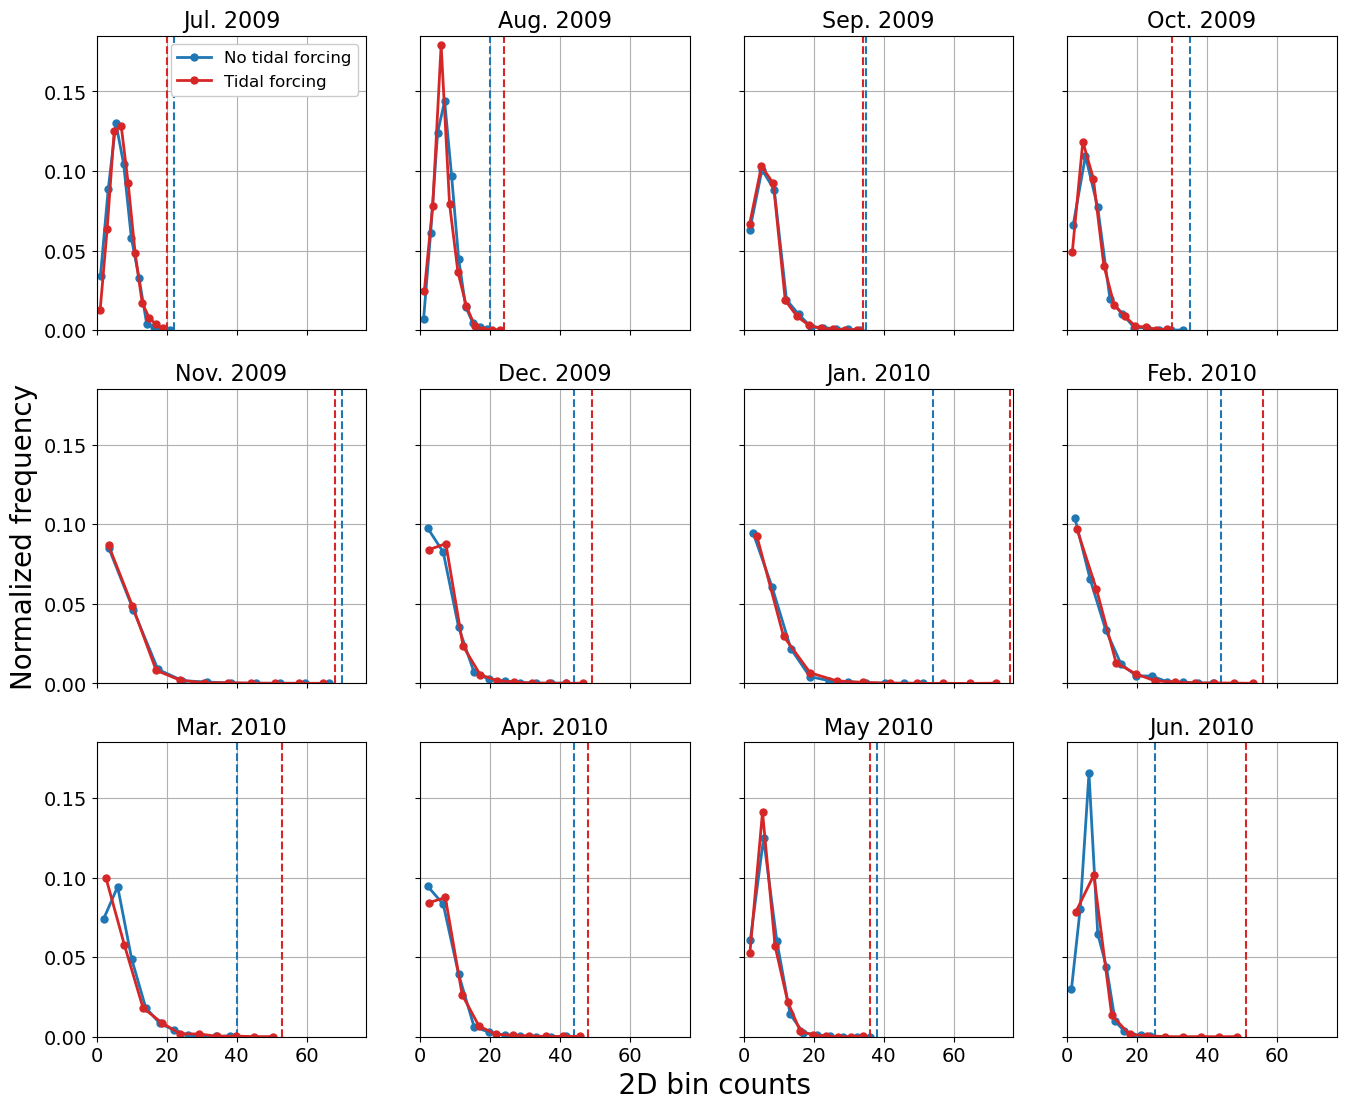

In [19]:
bins_list = 10

ymax_1d = 0.185
xmax_1d = 77

fig = plt.figure(figsize=(16,13)) #(17,5)

gs = gridspec.GridSpec(3, 4)#, width_ratios=[.33, .33, .33]) #, .01])

for ii in range(0, len(ntitles)):
    ax1 = plt.subplot(gs[ii])
    
    ntitle = ntitles[ii]
    ######
    # Title
    if ntitle in ntitles[0:6]:
        nyear = '2009'
    elif ntitle in ntitles[6::]:
        nyear = '2010'
    else:
        print('Error nyear')
        dgdsgsg
        
    strtitle = ntitle + ' ' + nyear
    ax1.set_title(strtitle, size=16)
    ######
       
    counts_nT_1, binEdges_nT = np.histogram(counts_nT[ii,:], bins=bins_list, density=True)
    counts_wT_1, binEdges_wT = np.histogram(counts_wT[ii,:], bins=bins_list, density=True)
        
    bincenters_nT = 0.5 * (binEdges_nT[1:] + binEdges_nT[:-1])
    bincenters_wT = 0.5 * (binEdges_wT[1:] + binEdges_wT[:-1])
    
    ax1.plot(bincenters_nT, counts_nT_1, '.-', color='C0', label='No tidal forcing', linewidth=2, markersize=10)# , linewidth=4
    ax1.set_ylim([0, ymax_1d])
    ax1.set_xlim([0, xmax_1d])
    ax1.axvline(x=counts_nT[ii,:].max(), linestyle='--', color='C0')
    
    ax1.plot(bincenters_wT, counts_wT_1, '.-', color='C3', label='Tidal forcing', linewidth=2, markersize=10)# , linewidth=4
    ax1.set_ylim([0, ymax_1d])
    ax1.set_xlim([0, xmax_1d])
    ax1.axvline(x=counts_wT[ii,:].max(), linestyle='--', color='C3')
    
    ax1.grid()
    ax1.tick_params(axis='both', which='major', labelsize=14)

    if ii == 0:
        legend = ax1.legend(loc=0, fontsize=12)
        legend.get_frame().set_alpha(None)
        legend.get_frame().set_facecolor('white')
    if ((ii==4)):
        ax1.set_ylabel('Normalized frequency', size=20) # Normalized bin counts
    if ((ii==9)):
        ax1.set_xlabel('                                    2D bin counts', size=20)
    if ii<8 :
        ax1.axes.xaxis.set_ticklabels([])
    if (ii != 0) & (ii != 4) & (ii != 8) :
        ax1.axes.yaxis.set_ticklabels([])

plt.savefig('../../Figures/' + 'hist1d_nT_wT_monthly_nobox_new.jpg', dpi=300)
  
plt.show()
